# Project for predicting the variation in the annual expenditure due to the increase in the energy cost on P3 dataset

## Importing Libraries

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR

##  Reading the P3 data set

In [2]:


Electricity = pd.read_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\CE802_P3_Data\\CE802_P3_Data.csv')
Electricity

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-69.21,16536.84,6,Europe,-16720.42,735.74,22.14,15.48,Medium,124.05,...,-506.31,-3077.82,15.35,-53.04,-112.43,-2537.30,4.06,40.32,3.18,2697.84
1,-168.67,28434.21,12,UK,-8070.93,91.35,-1.86,18.60,Very high,57.78,...,-731.28,-4559.70,20.74,-36.44,-44.06,-2384.48,33.52,176.98,5.81,3632.57
2,-76.19,22895.97,18,Europe,-12126.02,145.64,-68.28,14.22,High,-65.88,...,-355.08,-3965.13,16.65,-76.06,-81.66,-2225.42,28.90,165.00,2.85,2257.40
3,-103.19,22926.51,12,Europe,-10050.95,218.39,-40.58,14.99,Very high,132.12,...,-518.52,-1509.87,21.99,-128.34,-142.53,-1320.10,1.12,211.88,2.96,1785.03
4,-49.84,-4224.12,6,Rest,-10197.84,-346.17,-47.04,8.92,High,113.31,...,-576.60,-1907.67,14.10,72.98,-75.83,-2019.04,8.16,154.32,2.92,1063.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-50.50,25230.48,9,Rest,-10631.66,456.24,-22.64,14.79,Very low,98.16,...,-591.03,-4610.67,17.87,19.32,-51.93,-1714.14,3.56,174.96,5.04,6.64
1496,-131.43,33310.62,24,USA,-7262.50,653.10,33.66,16.25,High,52.11,...,-578.10,-3536.10,23.96,-0.08,-73.51,-2230.94,0.58,231.90,6.37,-660.57
1497,-31.35,22501.02,12,Europe,-11386.26,-215.22,11.04,14.43,Medium,34.23,...,-375.90,-4099.32,8.77,21.08,-66.38,-1547.98,0.06,161.12,1.84,342.65
1498,-67.45,21919.62,18,UK,-8660.33,632.65,30.34,16.21,Low,100.92,...,-598.89,-4131.60,5.32,31.86,-40.93,-2179.50,64.20,351.34,4.97,2392.99


In [3]:
Electricity.dtypes    # checking the datatypes of each feature

F1        float64
F2        float64
F3          int64
F4         object
F5        float64
F6        float64
F7        float64
F8        float64
F9         object
F10       float64
F11       float64
F12       float64
F13       float64
F14       float64
F15       float64
F16       float64
F17       float64
F18       float64
F19       float64
F20       float64
F21       float64
F22       float64
F23       float64
F24       float64
F25       float64
F26         int64
F27       float64
F28       float64
F29       float64
F30       float64
F31       float64
F32       float64
F33       float64
F34       float64
F35       float64
F36       float64
Target    float64
dtype: object

## converting the categorial values to Numerical values

In [4]:

cleanup = {"F4": {"Europe":1, "UK":2, "Rest": 3, "USA" : 4} , "F9": {"Low": 0 , "Very low":1, "Medium":2, "High": 3, "Very high" : 4}}
Electricity.replace(cleanup, inplace=True)

In [5]:
Electricity

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-69.21,16536.84,6,1,-16720.42,735.74,22.14,15.48,2,124.05,...,-506.31,-3077.82,15.35,-53.04,-112.43,-2537.30,4.06,40.32,3.18,2697.84
1,-168.67,28434.21,12,2,-8070.93,91.35,-1.86,18.60,4,57.78,...,-731.28,-4559.70,20.74,-36.44,-44.06,-2384.48,33.52,176.98,5.81,3632.57
2,-76.19,22895.97,18,1,-12126.02,145.64,-68.28,14.22,3,-65.88,...,-355.08,-3965.13,16.65,-76.06,-81.66,-2225.42,28.90,165.00,2.85,2257.40
3,-103.19,22926.51,12,1,-10050.95,218.39,-40.58,14.99,4,132.12,...,-518.52,-1509.87,21.99,-128.34,-142.53,-1320.10,1.12,211.88,2.96,1785.03
4,-49.84,-4224.12,6,3,-10197.84,-346.17,-47.04,8.92,3,113.31,...,-576.60,-1907.67,14.10,72.98,-75.83,-2019.04,8.16,154.32,2.92,1063.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-50.50,25230.48,9,3,-10631.66,456.24,-22.64,14.79,1,98.16,...,-591.03,-4610.67,17.87,19.32,-51.93,-1714.14,3.56,174.96,5.04,6.64
1496,-131.43,33310.62,24,4,-7262.50,653.10,33.66,16.25,3,52.11,...,-578.10,-3536.10,23.96,-0.08,-73.51,-2230.94,0.58,231.90,6.37,-660.57
1497,-31.35,22501.02,12,1,-11386.26,-215.22,11.04,14.43,2,34.23,...,-375.90,-4099.32,8.77,21.08,-66.38,-1547.98,0.06,161.12,1.84,342.65
1498,-67.45,21919.62,18,2,-8660.33,632.65,30.34,16.21,0,100.92,...,-598.89,-4131.60,5.32,31.86,-40.93,-2179.50,64.20,351.34,4.97,2392.99


In [6]:
Electric_copy = Electricity.iloc[:,:].copy()           # creating copy of original datagrame
Electric_copy 

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-69.21,16536.84,6,1,-16720.42,735.74,22.14,15.48,2,124.05,...,-506.31,-3077.82,15.35,-53.04,-112.43,-2537.30,4.06,40.32,3.18,2697.84
1,-168.67,28434.21,12,2,-8070.93,91.35,-1.86,18.60,4,57.78,...,-731.28,-4559.70,20.74,-36.44,-44.06,-2384.48,33.52,176.98,5.81,3632.57
2,-76.19,22895.97,18,1,-12126.02,145.64,-68.28,14.22,3,-65.88,...,-355.08,-3965.13,16.65,-76.06,-81.66,-2225.42,28.90,165.00,2.85,2257.40
3,-103.19,22926.51,12,1,-10050.95,218.39,-40.58,14.99,4,132.12,...,-518.52,-1509.87,21.99,-128.34,-142.53,-1320.10,1.12,211.88,2.96,1785.03
4,-49.84,-4224.12,6,3,-10197.84,-346.17,-47.04,8.92,3,113.31,...,-576.60,-1907.67,14.10,72.98,-75.83,-2019.04,8.16,154.32,2.92,1063.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-50.50,25230.48,9,3,-10631.66,456.24,-22.64,14.79,1,98.16,...,-591.03,-4610.67,17.87,19.32,-51.93,-1714.14,3.56,174.96,5.04,6.64
1496,-131.43,33310.62,24,4,-7262.50,653.10,33.66,16.25,3,52.11,...,-578.10,-3536.10,23.96,-0.08,-73.51,-2230.94,0.58,231.90,6.37,-660.57
1497,-31.35,22501.02,12,1,-11386.26,-215.22,11.04,14.43,2,34.23,...,-375.90,-4099.32,8.77,21.08,-66.38,-1547.98,0.06,161.12,1.84,342.65
1498,-67.45,21919.62,18,2,-8660.33,632.65,30.34,16.21,0,100.92,...,-598.89,-4131.60,5.32,31.86,-40.93,-2179.50,64.20,351.34,4.97,2392.99


## Heatmap correlation visualization of train data

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5]),
 [Text(0.5, 0, 'F1'),
  Text(1.5, 0, 'F2'),
  Text(2.5, 0, 'F3'),
  Text(3.5, 0, 'F4'),
  Text(4.5, 0, 'F5'),
  Text(5.5, 0, 'F6'),
  Text(6.5, 0, 'F7'),
  Text(7.5, 0, 'F8'),
  Text(8.5, 0, 'F9'),
  Text(9.5, 0, 'F10'),
  Text(10.5, 0, 'F11'),
  Text(11.5, 0, 'F12'),
  Text(12.5, 0, 'F13'),
  Text(13.5, 0, 'F14'),
  Text(14.5, 0, 'F15'),
  Text(15.5, 0, 'F16'),
  Text(16.5, 0, 'F17'),
  Text(17.5, 0, 'F18'),
  Text(18.5, 0, 'F19'),
  Text(19.5, 0, 'F20'),
  Text(20.5, 0, 'F21'),
  Text(21.5, 0, 'F22'),
  Text(22.5, 0, 'F23'),
  Text(23.5, 0, 'F24'),
  Text(24.5, 0, 'F25'),
  Text(25.5, 0, 'F26'),
  Text(26.5, 0, 'F27'),
  Text(27.5, 0, 'F28'),
  Text(28.5, 0, 'F29'),
  Text(29.5, 0, 'F30'),
  Text(30.5, 0, 'F31'),
  Text(31.5, 0, 'F3

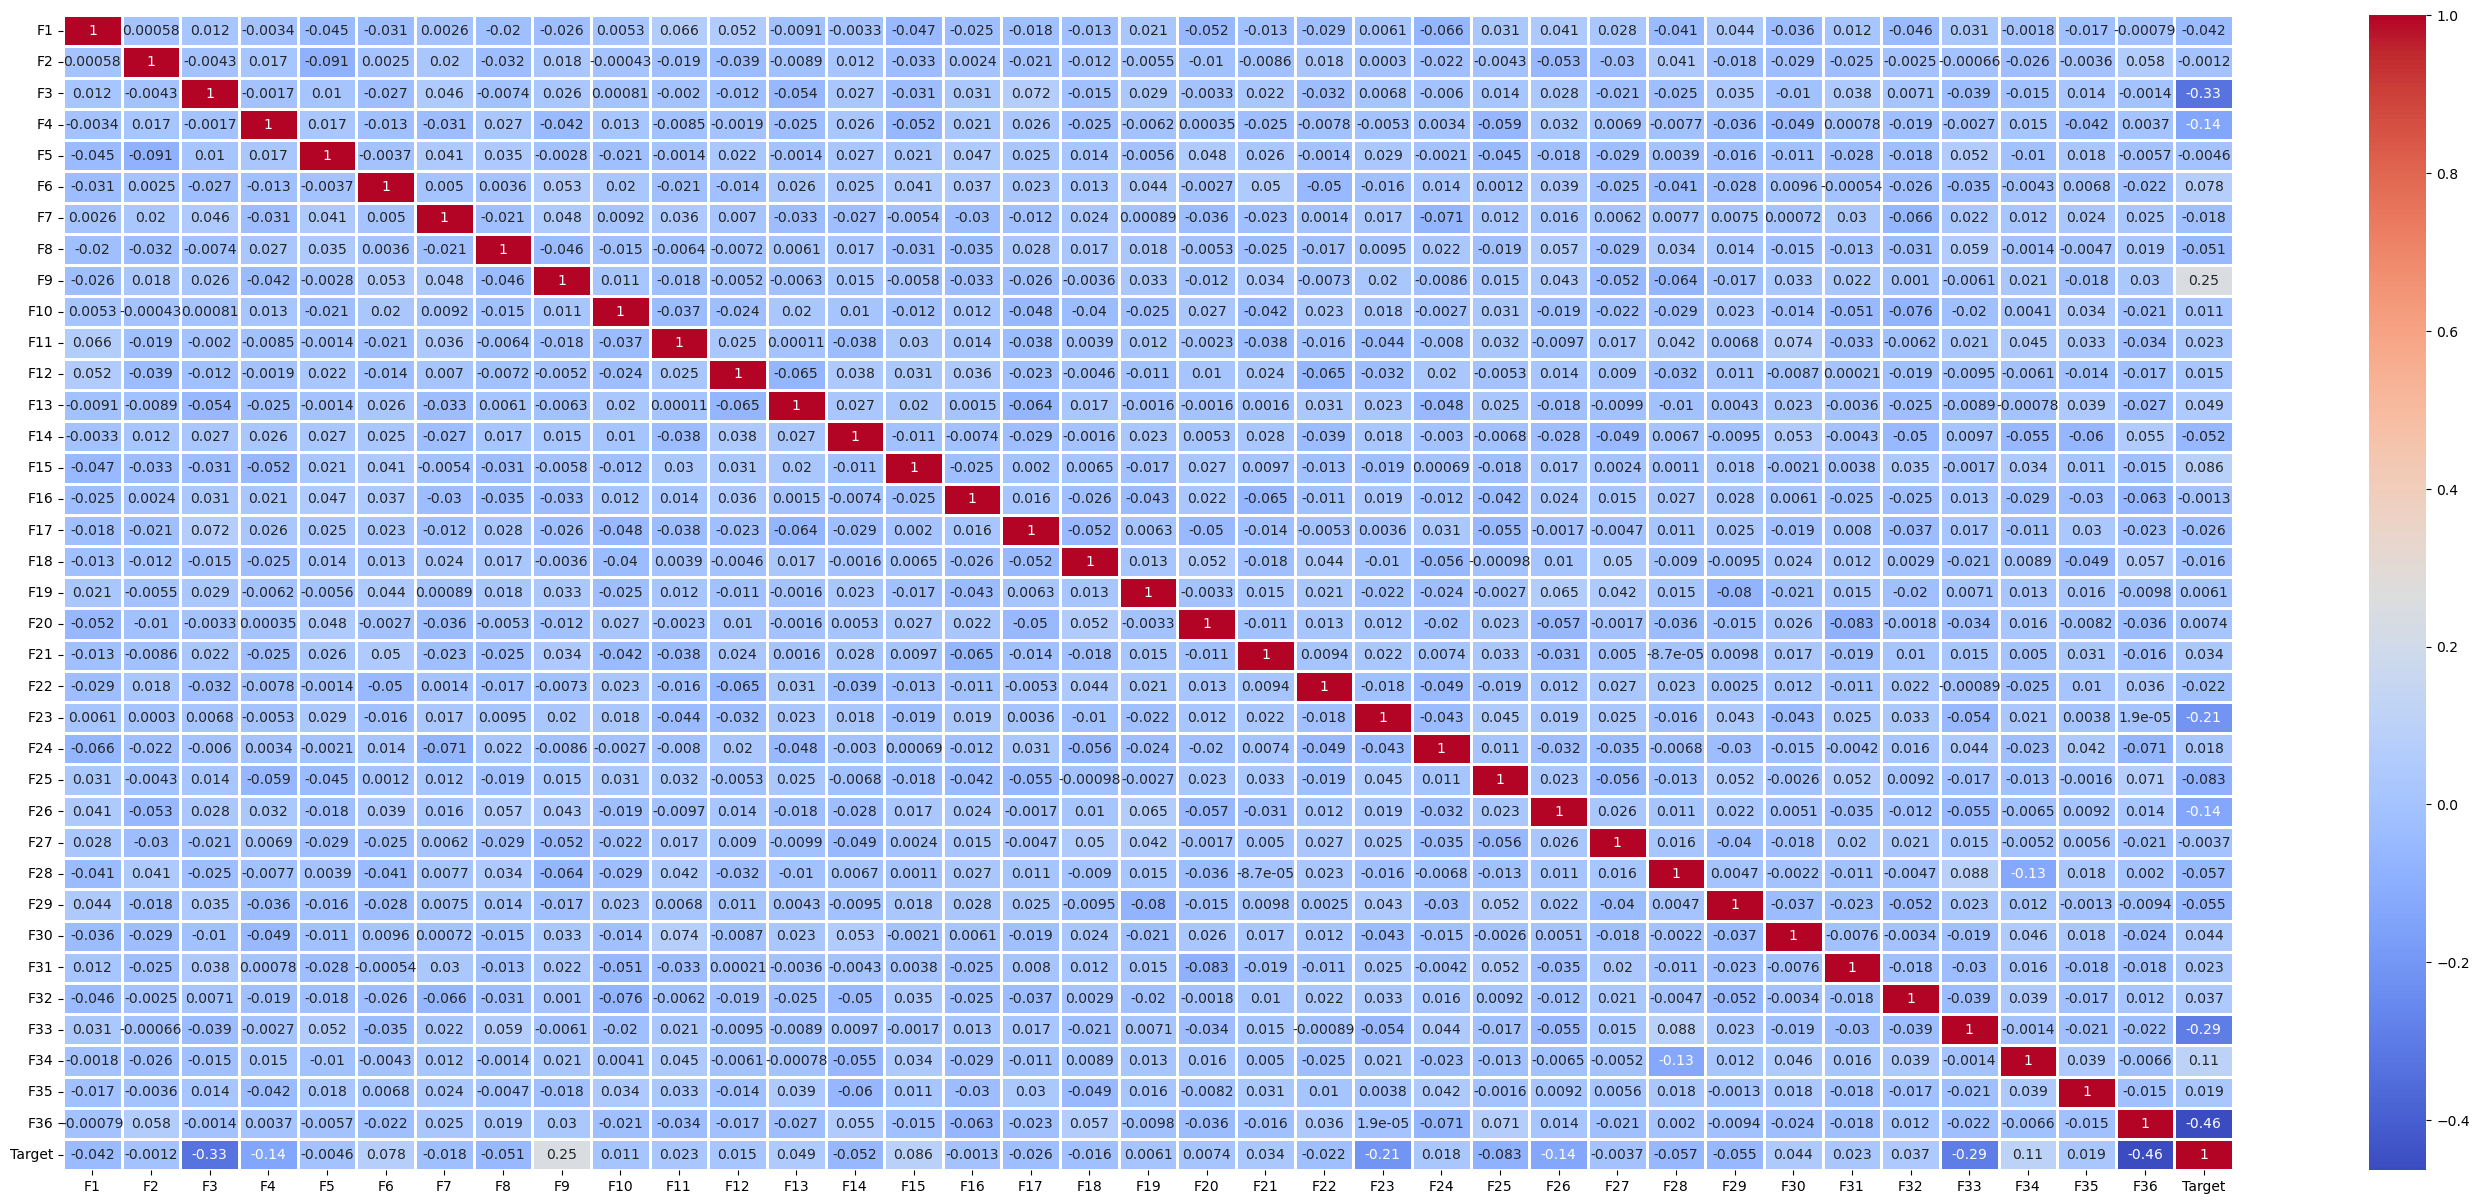

In [7]:

plt.figure(figsize = (35,15))            # Matplotlib Figure
sns.heatmap(Electric_copy.corr(), annot = True, linewidths=2, fmt=".2g", cmap= 'coolwarm') 

plt.xticks(rotation='horizontal')

##### Input and output data separation

In [8]:


x = Electric_copy.loc[:, Electric_copy.columns != 'Target'].to_numpy()
y = Electric_copy.loc[:, 'Target'] #.to_numpy()

In [9]:
x

array([[-6.921000e+01,  1.653684e+04,  6.000000e+00, ...,  4.060000e+00,
         4.032000e+01,  3.180000e+00],
       [-1.686700e+02,  2.843421e+04,  1.200000e+01, ...,  3.352000e+01,
         1.769800e+02,  5.810000e+00],
       [-7.619000e+01,  2.289597e+04,  1.800000e+01, ...,  2.890000e+01,
         1.650000e+02,  2.850000e+00],
       ...,
       [-3.135000e+01,  2.250102e+04,  1.200000e+01, ...,  6.000000e-02,
         1.611200e+02,  1.840000e+00],
       [-6.745000e+01,  2.191962e+04,  1.800000e+01, ...,  6.420000e+01,
         3.513400e+02,  4.970000e+00],
       [-7.915000e+01,  2.132970e+04,  2.400000e+01, ...,  1.428000e+01,
         7.258000e+01,  4.390000e+00]])

In [10]:
y

0       2697.84
1       3632.57
2       2257.40
3       1785.03
4       1063.23
         ...   
1495       6.64
1496    -660.57
1497     342.65
1498    2392.99
1499     509.97
Name: Target, Length: 1500, dtype: float64

In [11]:
y = y.values.reshape(-1,1)   # reshaping target column

In [12]:
# check missing data status
Electric_copy.isna().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
F35       0
F36       0
Target    0
dtype: int64

## Scaling the data between 0 to 1

In [13]:
ss = StandardScaler()
ss.fit(x)
x = ss.transform(x)

x

array([[ 0.10743492, -0.55350155, -1.12654036, ..., -0.10204844,
        -1.72298778, -0.4261465 ],
       [-2.31286451,  0.78008148,  0.01291381, ..., -0.0811154 ,
        -0.18214869,  0.51644933],
       [-0.0624192 ,  0.15929698,  1.15236799, ..., -0.08439818,
        -0.31722298, -0.54441898],
       ...,
       [ 1.0287353 ,  0.11502681,  0.01291381, ..., -0.10489067,
        -0.36096991, -0.90640445],
       [ 0.15026346,  0.04985735,  1.15236799, ..., -0.05931549,
         1.78375723,  0.21539211],
       [-0.13444902, -0.01626712,  2.29182217, ..., -0.09478654,
        -1.35925685,  0.00751926]])

# Data splitting on Training dataset using train test split

In [14]:

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2 ,random_state = 42)

In [15]:
print(X_train.shape , X_test.shape)       # check the shape/size of training and testing set

(1200, 36) (300, 36)


# Linear Regression 


In [16]:

LinearReg = LinearRegression()
LinearReg.fit(X_train, Y_train)

LinearRegression()

##### Predicted results from train dataset

In [17]:

y_predict_lr = LinearReg.predict(X_test)
y_predict_lr

array([[ 5.03827013e+02],
       [ 2.31620637e+03],
       [ 6.56899766e+02],
       [ 4.71874809e+02],
       [ 1.46182172e+01],
       [ 5.40118078e+02],
       [ 8.67993001e+02],
       [-3.51782729e+02],
       [ 2.08542737e+02],
       [ 1.96584705e+03],
       [-3.83802324e+02],
       [ 1.05621215e+03],
       [ 1.21131152e+02],
       [-2.75064031e+02],
       [ 2.30276282e+03],
       [ 1.10900022e+02],
       [ 3.64417538e+02],
       [ 1.71703476e+03],
       [ 1.61819602e+03],
       [ 9.42681770e+02],
       [ 1.46498236e+03],
       [ 9.45529657e+02],
       [-6.73385565e+02],
       [-8.38036743e+02],
       [ 4.10496217e+02],
       [ 2.06229444e+03],
       [ 2.09156110e+03],
       [-1.76643164e+02],
       [ 2.95341800e+03],
       [ 1.68268929e+03],
       [-1.14916405e+03],
       [-1.37600105e+03],
       [ 6.22910172e+00],
       [ 1.33908212e+03],
       [-6.19179530e+02],
       [ 3.33729432e+02],
       [ 6.01298992e+02],
       [ 1.63188305e+03],
       [ 1.8

##### Actual result scores from test dataset

In [18]:

Y_test

array([[ -121.99],
       [ 2746.32],
       [ -141.66],
       [  522.06],
       [  588.17],
       [ 1424.41],
       [ 2977.55],
       [ -171.98],
       [   72.89],
       [ 2348.52],
       [ -345.53],
       [ 1237.66],
       [ -922.89],
       [ -149.45],
       [ 2107.14],
       [-1136.93],
       [  583.04],
       [ 1742.45],
       [ 2290.18],
       [ 1057.77],
       [  310.64],
       [  932.81],
       [ -179.09],
       [ -130.06],
       [ 1577.69],
       [ 3404.72],
       [ 3711.69],
       [  331.17],
       [ 2722.76],
       [ 2452.15],
       [ -161.08],
       [ -141.18],
       [  -27.86],
       [  180.69],
       [ -616.26],
       [ -294.63],
       [-1171.58],
       [ 1279.99],
       [  659.81],
       [  759.37],
       [ -739.  ],
       [ -622.82],
       [   38.3 ],
       [  191.04],
       [ 2051.63],
       [   96.81],
       [  849.12],
       [ 2894.06],
       [ 2783.21],
       [  522.51],
       [ 2409.66],
       [ 2844.51],
       [ 290

##### Model Evaluation using R-Square, MSE ans RMSE technique for Linear Regression

In [19]:

r_sq_error = metrics.r2_score(Y_test, y_predict_lr)

print('R-Square Error for Linear Regression:', r_sq_error)
print('Mean Squared Error for Linear Regression:', metrics.mean_squared_error(Y_test, y_predict_lr))
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(Y_test, y_predict_lr)))

R-Square Error for Linear Regression: 0.5754527099170836
Mean Squared Error for Linear Regression: 601024.0224010611
Root Mean Squared Error for Linear Regression: 775.2573910650973




# Decision Tree Regressor

In [20]:

DecisionReg = DecisionTreeRegressor(random_state = 0)   #decision tree regressor object
  
# Fitting the decision tree regressor with training data
DecisionReg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

##### Predicted results from train dataset

In [21]:
y_predict_dtr = DecisionReg.predict((X_test))
y_predict_dtr


array([ 1.39675e+03,  1.19516e+03,  4.18300e+01,  8.17380e+02,
       -4.78000e+01,  2.38297e+03,  2.57554e+03,  4.25970e+02,
        1.85340e+02,  1.52546e+03, -3.77460e+02, -1.46660e+02,
       -1.79854e+03,  3.97700e+01,  6.04590e+02,  3.70750e+02,
        1.31390e+02,  1.39675e+03,  1.71851e+03,  9.26980e+02,
        5.04610e+02,  1.20742e+03, -1.32500e+02,  7.30700e+02,
        4.89460e+02,  2.28398e+03,  3.15446e+03,  5.11640e+02,
        2.83292e+03,  2.59674e+03, -1.11360e+02,  4.01590e+02,
       -1.59280e+02,  8.41940e+02, -3.77460e+02,  4.01590e+02,
        3.41190e+02,  1.78530e+02,  7.68220e+02,  4.94690e+02,
       -1.45860e+03, -1.20260e+02,  1.74500e+01, -1.31220e+02,
       -1.02480e+02,  1.05750e+02,  3.02634e+03,  3.49068e+03,
        2.80501e+03,  3.88490e+02,  1.73890e+02,  2.48623e+03,
        2.80501e+03, -3.93200e+01, -8.94070e+02,  4.80010e+02,
        9.46970e+02, -1.34300e+02, -3.77460e+02,  6.21120e+02,
        1.79210e+02, -9.59200e+01,  3.59841e+03,  5.456

##### Model Evaluation using R-Square , MSE and RMSE techniques for Decision Tree Regression

In [22]:
r_sq_error = metrics.r2_score(Y_test, y_predict_dtr)
print('R-Square Error associated with Decision Tree Regression is:', r_sq_error)

print('Mean Squared Error for Decision Tree Regression:', metrics.mean_squared_error(Y_test, y_predict_dtr))
print('Root Mean Squared Error for Decision Tree Regression:', np.sqrt(metrics.mean_squared_error(Y_test, y_predict_dtr)))

R-Square Error associated with Decision Tree Regression is: 0.27859110024649236
Mean Squared Error for Decision Tree Regression: 1021285.7056303334
Root Mean Squared Error for Decision Tree Regression: 1010.5868125155471


# Random forest regressor

In [23]:

RandomFReg = RandomForestRegressor(n_estimators = 500, random_state = 42)
  
# Fitting the random forest regressor with training data
RandomFReg.fit(X_train, Y_train)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22248\3539961449.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomFReg.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=500, random_state=42)

##### Predicted results from train dataset

In [24]:

y_predict_rfr = RandomFReg.predict((X_test))
y_predict_rfr


array([ 5.37632880e+02,  2.14922054e+03,  1.54942540e+02,  1.12743370e+03,
        1.15396200e+03,  1.69660464e+03,  1.78489614e+03,  1.29628400e+01,
        5.29125160e+02,  1.53108818e+03,  1.63137700e+02,  6.87102460e+02,
       -6.85412320e+02,  4.56500000e-01,  1.48477614e+03,  2.27899740e+02,
        4.84002380e+02,  1.54741852e+03,  1.80174994e+03,  1.14678996e+03,
        8.22671560e+02,  4.86558560e+02, -1.97112300e+02,  3.26650640e+02,
        1.00694974e+03,  2.21221832e+03,  2.98978244e+03,  4.58542220e+02,
        2.03100438e+03,  2.10144212e+03, -4.75022200e+01,  3.00778120e+02,
        5.78206200e+01,  9.36754740e+02,  2.30615640e+02,  6.82013720e+02,
       -2.73536000e+00,  1.32907120e+02,  7.79340060e+02,  9.14607900e+02,
        6.31762000e+01, -1.43234660e+02,  1.90012120e+02,  4.64862740e+02,
        1.11074678e+03,  3.00802740e+02,  9.46709060e+02,  2.25830896e+03,
        2.50990862e+03,  4.53440860e+02,  1.91366084e+03,  2.27465910e+03,
        2.47299324e+03,  

##### Model Evaluation using R-Square, MSE and RMSE techniques for Random Forest Regression

In [25]:

r_sq_error = metrics.r2_score(Y_test, y_predict_rfr)

print('R-Square Error for Random Forest Regression :', r_sq_error)
print('Mean Squared Error for Random Forest Regression :', metrics.mean_squared_error(Y_test, y_predict_rfr))
print('Root Mean Squared Error for Random Forest Regression :', np.sqrt(metrics.mean_squared_error(Y_test, y_predict_rfr)))

R-Square Error for Random Forest Regression : 0.7073218755418167
Mean Squared Error for Random Forest Regression : 414339.1978695713
Root Mean Squared Error for Random Forest Regression : 643.6918500878904


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

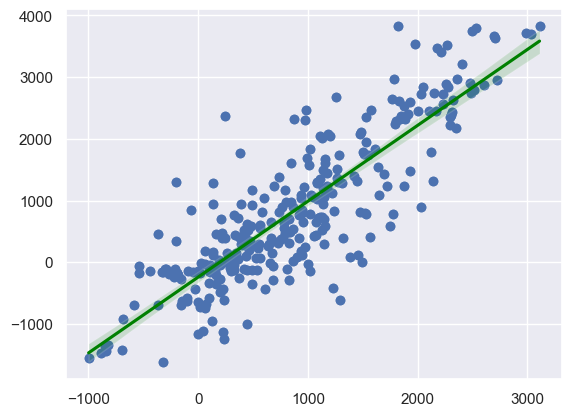

In [26]:
#  Scatter graph

sns.set()
plt.scatter(y_predict_rfr, Y_test)
sns.regplot(y_predict_rfr, Y_test, line_kws={'color': 'green'})

# Support Vector Regressor

In [27]:

SVregressor = SVR(kernel = 'rbf')
SVregressor.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##### Predicted results from train dataset

In [28]:

y_predict_svr = SVregressor.predict(X_test)

y_predict_svr

array([627.44256824, 640.1319906 , 627.67570687, 627.98195465,
       623.29376753, 630.2516019 , 631.91797575, 621.52284379,
       626.18117339, 639.35464855, 624.46161494, 634.93210155,
       626.92830084, 626.1121569 , 643.74421498, 626.91723137,
       627.08867703, 635.96269101, 638.31451288, 633.78823188,
       633.63026065, 632.6927113 , 621.15867613, 620.19846821,
       630.47228228, 642.09787715, 643.91314073, 623.56543725,
       643.26176061, 634.13021373, 616.24644149, 623.1529596 ,
       623.53365205, 634.39191825, 623.02030808, 630.00857125,
       631.66123809, 638.54279604, 638.87046082, 634.18994417,
       625.72049276, 619.0940416 , 630.00895062, 629.13918352,
       629.91810895, 628.9717819 , 621.5572891 , 634.17807869,
       642.45385784, 630.17410945, 637.99316454, 641.20691264,
       643.06693277, 619.621705  , 624.23485434, 633.49480185,
       628.2693707 , 632.33321915, 620.28329577, 633.71410101,
       627.67559589, 628.70926393, 635.84540494, 641.70

##### Model Evaluation using R-Square , MSE and RMSE techniques for Support Vector Regressor

In [29]:
r_sq_error = metrics.r2_score(Y_test, y_predict_svr)

print('R-Square Error associated with Support vector regressor :', r_sq_error)

print('Mean Squared Error for Support vector regressor  :', metrics.mean_squared_error(Y_test, y_predict_svr))
print('Root Mean Squared Error for Support vector regressor :', np.sqrt(metrics.mean_squared_error(Y_test, y_predict_svr)))

R-Square Error associated with Support vector regressor : -0.015733799981890284
Mean Squared Error for Support vector regressor  : 1437956.2145705854
Root Mean Squared Error for Support vector regressor : 1199.1481203631959


## Predictions on the test data

##### Loading the test data

In [30]:


test_df = pd.read_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\CE802_P3_Data\\CE802_P3_Test.csv')
test_df



,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-56.72,38823.54,15,UK,-13543.15,546.28,34.36,7.48,Very low,131.10,...,-630.75,-4333.50,22.24,-29.56,-115.71,-2244.72,9.90,188.92,3.82,NaN
1,-30.02,26257.26,9,UK,-8756.95,129.38,-65.78,17.04,Low,204.21,...,-671.94,-4596.81,13.40,-27.86,-118.76,-3062.78,7.46,159.32,2.12,NaN
2,-77.74,36796.41,9,Europe,-11282.85,-114.65,150.92,16.62,Very high,148.17,...,-630.24,-4273.08,15.39,181.50,-110.21,-3252.60,2.48,290.84,5.49,NaN
3,-116.33,22185.09,15,UK,-6767.20,296.77,28.26,4.71,Medium,31.65,...,-628.44,-3302.31,13.31,23.42,-115.30,-801.38,1.96,190.42,4.26,NaN
4,-165.88,24719.22,12,Europe,-12559.80,152.00,43.14,14.56,Medium,81.18,...,-436.68,-4826.94,16.84,28.10,-119.98,-1925.68,64.92,161.44,0.98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-85.59,10580.01,9,USA,-14324.57,422.30,22.02,15.17,Very high,45.09,...,-572.28,-3118.74,14.59,-12.82,-119.02,-2228.56,1.44,218.68,0.48,NaN
1496,-95.36,27995.85,12,Rest,-7794.22,713.26,-34.94,23.21,Medium,120.69,...,-809.94,-4015.74,18.95,-39.92,-114.63,-2798.96,3.28,167.66,7.38,NaN
1497,-95.80,7226.31,3,UK,-11705.29,325.18,54.56,16.53,Medium,109.86,...,-640.50,-4266.30,19.46,-28.36,-145.70,-1460.80,3.32,-21.82,7.55,NaN
1498,-117.19,24718.80,15,UK,-11426.73,582.80,62.20,13.75,Medium,208.29,...,-683.49,-3913.29,21.56,3.78,-77.65,-2565.16,7.04,262.20,2.22,NaN


In [31]:
# Working on a copy

test_data = test_df.iloc[:,:-1].copy()
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,-56.72,38823.54,15,UK,-13543.15,546.28,34.36,7.48,Very low,131.10,...,-285.32,-630.75,-4333.50,22.24,-29.56,-115.71,-2244.72,9.90,188.92,3.82
1,-30.02,26257.26,9,UK,-8756.95,129.38,-65.78,17.04,Low,204.21,...,55.93,-671.94,-4596.81,13.40,-27.86,-118.76,-3062.78,7.46,159.32,2.12
2,-77.74,36796.41,9,Europe,-11282.85,-114.65,150.92,16.62,Very high,148.17,...,-121.33,-630.24,-4273.08,15.39,181.50,-110.21,-3252.60,2.48,290.84,5.49
3,-116.33,22185.09,15,UK,-6767.20,296.77,28.26,4.71,Medium,31.65,...,-392.69,-628.44,-3302.31,13.31,23.42,-115.30,-801.38,1.96,190.42,4.26
4,-165.88,24719.22,12,Europe,-12559.80,152.00,43.14,14.56,Medium,81.18,...,-813.73,-436.68,-4826.94,16.84,28.10,-119.98,-1925.68,64.92,161.44,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-85.59,10580.01,9,USA,-14324.57,422.30,22.02,15.17,Very high,45.09,...,-358.63,-572.28,-3118.74,14.59,-12.82,-119.02,-2228.56,1.44,218.68,0.48
1496,-95.36,27995.85,12,Rest,-7794.22,713.26,-34.94,23.21,Medium,120.69,...,-396.02,-809.94,-4015.74,18.95,-39.92,-114.63,-2798.96,3.28,167.66,7.38
1497,-95.80,7226.31,3,UK,-11705.29,325.18,54.56,16.53,Medium,109.86,...,-169.74,-640.50,-4266.30,19.46,-28.36,-145.70,-1460.80,3.32,-21.82,7.55
1498,-117.19,24718.80,15,UK,-11426.73,582.80,62.20,13.75,Medium,208.29,...,-69.24,-683.49,-3913.29,21.56,3.78,-77.65,-2565.16,7.04,262.20,2.22


In [32]:
# check missing data status
test_data.isna().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
F22    0
F23    0
F24    0
F25    0
F26    0
F27    0
F28    0
F29    0
F30    0
F31    0
F32    0
F33    0
F34    0
F35    0
F36    0
dtype: int64

##### Converting the Categorial values to Numerical values

In [33]:

cleanup_t = {"F4": {"Europe":1, "UK":2, "Rest": 3, "USA" : 4} , "F9": {"Low": 0 , "Very low":1, "Medium":2, "High": 3, "Very high" : 4}}
test_data.replace(cleanup_t, inplace=True)

In [34]:
T_df = pd.DataFrame(test_data)
T_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,-56.72,38823.54,15,2,-13543.15,546.28,34.36,7.48,1,131.10,...,-285.32,-630.75,-4333.50,22.24,-29.56,-115.71,-2244.72,9.90,188.92,3.82
1,-30.02,26257.26,9,2,-8756.95,129.38,-65.78,17.04,0,204.21,...,55.93,-671.94,-4596.81,13.40,-27.86,-118.76,-3062.78,7.46,159.32,2.12
2,-77.74,36796.41,9,1,-11282.85,-114.65,150.92,16.62,4,148.17,...,-121.33,-630.24,-4273.08,15.39,181.50,-110.21,-3252.60,2.48,290.84,5.49
3,-116.33,22185.09,15,2,-6767.20,296.77,28.26,4.71,2,31.65,...,-392.69,-628.44,-3302.31,13.31,23.42,-115.30,-801.38,1.96,190.42,4.26
4,-165.88,24719.22,12,1,-12559.80,152.00,43.14,14.56,2,81.18,...,-813.73,-436.68,-4826.94,16.84,28.10,-119.98,-1925.68,64.92,161.44,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-85.59,10580.01,9,4,-14324.57,422.30,22.02,15.17,4,45.09,...,-358.63,-572.28,-3118.74,14.59,-12.82,-119.02,-2228.56,1.44,218.68,0.48
1496,-95.36,27995.85,12,3,-7794.22,713.26,-34.94,23.21,2,120.69,...,-396.02,-809.94,-4015.74,18.95,-39.92,-114.63,-2798.96,3.28,167.66,7.38
1497,-95.80,7226.31,3,2,-11705.29,325.18,54.56,16.53,2,109.86,...,-169.74,-640.50,-4266.30,19.46,-28.36,-145.70,-1460.80,3.32,-21.82,7.55
1498,-117.19,24718.80,15,2,-11426.73,582.80,62.20,13.75,2,208.29,...,-69.24,-683.49,-3913.29,21.56,3.78,-77.65,-2565.16,7.04,262.20,2.22


In [35]:
predicted = RandomFReg.predict(T_df)    # prediction with random forest regressor as the R-square score is high as compared to other ML techniques
 
# Replacing the last (empty) column with the prediction
test_df.iloc[:,-1] = predicted



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [36]:
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-56.72,38823.54,15,UK,-13543.15,546.28,34.36,7.48,Very low,131.10,...,-630.75,-4333.50,22.24,-29.56,-115.71,-2244.72,9.90,188.92,3.82,561.87294
1,-30.02,26257.26,9,UK,-8756.95,129.38,-65.78,17.04,Low,204.21,...,-671.94,-4596.81,13.40,-27.86,-118.76,-3062.78,7.46,159.32,2.12,1015.17482
2,-77.74,36796.41,9,Europe,-11282.85,-114.65,150.92,16.62,Very high,148.17,...,-630.24,-4273.08,15.39,181.50,-110.21,-3252.60,2.48,290.84,5.49,653.68626
3,-116.33,22185.09,15,UK,-6767.20,296.77,28.26,4.71,Medium,31.65,...,-628.44,-3302.31,13.31,23.42,-115.30,-801.38,1.96,190.42,4.26,650.64766
4,-165.88,24719.22,12,Europe,-12559.80,152.00,43.14,14.56,Medium,81.18,...,-436.68,-4826.94,16.84,28.10,-119.98,-1925.68,64.92,161.44,0.98,1610.73718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-85.59,10580.01,9,USA,-14324.57,422.30,22.02,15.17,Very high,45.09,...,-572.28,-3118.74,14.59,-12.82,-119.02,-2228.56,1.44,218.68,0.48,1715.84526
1496,-95.36,27995.85,12,Rest,-7794.22,713.26,-34.94,23.21,Medium,120.69,...,-809.94,-4015.74,18.95,-39.92,-114.63,-2798.96,3.28,167.66,7.38,449.64542
1497,-95.80,7226.31,3,UK,-11705.29,325.18,54.56,16.53,Medium,109.86,...,-640.50,-4266.30,19.46,-28.36,-145.70,-1460.80,3.32,-21.82,7.55,533.70202
1498,-117.19,24718.80,15,UK,-11426.73,582.80,62.20,13.75,Medium,208.29,...,-683.49,-3913.29,21.56,3.78,-77.65,-2565.16,7.04,262.20,2.22,1051.15406


In [38]:
# Saving to the destination file
test_df.to_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\CE802_P3_Data\\CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')


In [39]:
# Making sure if the last column has changed

print(pd.read_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\CE802_P3_Data\\CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\CE802_P3_Data\\CE802_P3_Test_Predictions.csv').iloc[:,:-1]))


True
